Paper: https://www.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf

They key concept is you project faces into a higher dimensional space and then measure distances between them in that space.

I'm quoting from this document (looks like an assignment for a class):

http://www.umiacs.umd.edu/~knkim/KG_VISA/PCA/FaceRecog_PCA_Kim.pdf

"PCA computes the basis of a space which is represented by its training vectors. These basis vectors, actually eigenvectors, computed by PCA are in the direction of the largest variance of the training vectors. As it has been said earlier, we call them eigenfaces.

Each eigenface can be viewed a feature. When a particular face is projected onto the face space, its vector into the face space describe the importance of each of those features in the face. The face is expressed in the face space by its eigenface coeﬃcients (or weights). We can handle a large input vector, facial image, only by taking its small weight vector in the face space. This means that we can reconstruct the original face with some error, since the dimensionality of the image space is much larger than that of face space.

In this report, let’s consider face identiﬁcation only. Each face in the training set is transformed into the face space and its components are stored in memory. The face space has to be populated with these known faces. An input face is given to the system, and then it is projected onto the face space. The system computes its distance from all the stored faces."

In [1]:
%matplotlib inline
from scipy.misc import *
from scipy import linalg
import glob
import numpy as np
import os
import pdb
import matplotlib.pyplot as plt

In [2]:
# Load the images
def Load_Images(path):
    files = glob.glob(path + "*.jpg")
    imgs = np.array([imread(i, True).flatten() for i in files])
    return imgs

In [3]:
# Run PCA on the input data
# Output: Eigenfaces, weights, mu
def PCA(data):
    mu = np.mean(data, 0)
    
    # Mean adjust the data
    data_mu = data - mu
    
    # Covariance Matrix
    #cov = np.dot(data_mu.T, data_mu)
    
    # Run SVD
    e_faces, sigma, v = linalg.svd(data_mu.T, full_matrices=False)
    
    # Compute weights for the image
    weights = np.dot(data_mu, e_faces)
    return e_faces, weights, mu, sigma

In [4]:
# Reconstruct image with 'k' given number of principal components
def Reconstruct(img_idx, e_faces, weights, mu, k):
    # Dot weights with eigenfaces and add to mean
    reconstruct = mu + np.dot(weights[img_idx, 0:k], e_faces[:, 0:k].T)
    return reconstruct

In [5]:
def Save_Image(path, img_id, img_dims, data):
    file_dir = path
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    imsave(file_dir + "image_" + str(img_id) + ".jpg", data.reshape(img_dims))

In [21]:
def Min_K(eigenvalues, p=0.60):
    total = sum(eigenvalues)
    temp_tot = total
    idx = -1
    while temp_tot > total * p:
        temp_tot = sum(eigenvalues[:idx])
        idx = idx - 1
    return len(eigenvalues) + idx

In [7]:
city = "Provo"

In [8]:
in_files = city + "_Affine/"

In [9]:
out_files = city + "_Affine_Out/"

In [10]:
dims = [200, 200]

In [11]:
data = Load_Images(in_files)

In [12]:
e_faces, weights, mu, sigma = PCA(data)

In [13]:
# Save the mean photo
imsave(out_files + "mean.jpg", mu.reshape(dims))

In [14]:
mu.shape

(40000,)

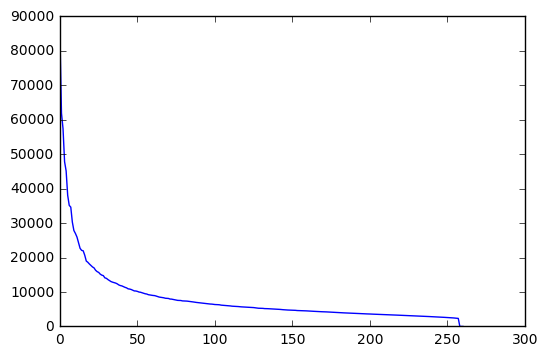

In [15]:
plt.plot(sigma)

In [24]:
# The first k-eigenvalues that make up p-power of the features
min_k = Min_K(sigma)